In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df=pd.read_csv('TM WY 2023 SWE.csv')
print(df)

    Site Id       Date   Time  WTEQ.I-1 (in)   PREC.I-1 (in)   \
0       830  10/1/2022    NaN             0.0             0.0   
1       830  10/2/2022    NaN             0.0             0.0   
2       830  10/3/2022    NaN             0.0             0.0   
3       830  10/4/2022    NaN             0.0             0.0   
4       830  10/5/2022    NaN             0.0             0.0   
..      ...        ...    ...             ...             ...   
365     830  9/30/2023  23:59           -99.9            57.2   
366     NaN        NaN    NaN             NaN             NaN   
367     NaN        NaN    NaN             NaN             NaN   
368     NaN        NaN    NaN             NaN             NaN   
369                NaN    NaN             NaN             NaN   

     TOBS.I-1 (degC)   TMAX.D-1 (degC)   TMIN.D-1 (degC)   TAVG.D-1 (degC)   \
0                -2.1               9.1              -2.2               2.6   
1                -0.9               9.9              -3.0    

In [11]:
df=df.iloc[:-4]  # remove last row which is a summary row
df.columns=df.columns.str.strip() # remove any leading/trailing whitespace
df=df.rename(columns={'Date':'Date', 'WTEQ.I-1 (in)': 'SWE', 'TAVG.D-1 (degC)': 'TAVG'})
print(df)

    Site Id       Date   Time   SWE  PREC.I-1 (in)  TOBS.I-1 (degC)  \
0       830  10/1/2022    NaN   0.0            0.0             -2.1   
1       830  10/2/2022    NaN   0.0            0.0             -0.9   
2       830  10/3/2022    NaN   0.0            0.0             -0.7   
3       830  10/4/2022    NaN   0.0            0.0              1.4   
4       830  10/5/2022    NaN   0.0            0.0              1.8   
..      ...        ...    ...   ...            ...              ...   
361     830  9/27/2023    NaN   0.0           57.1              1.4   
362     830  9/28/2023    NaN   0.0           57.1             -2.5   
363     830  9/29/2023    NaN   0.0           57.1              2.2   
364     830  9/30/2023    NaN   0.0           57.1              7.1   
365     830  9/30/2023  23:59 -99.9           57.2            -99.9   

     TMAX.D-1 (degC)  TMIN.D-1 (degC)  TAVG  SNWD.I-1 (in)  
0                9.1             -2.2   2.6            0.0  
1                9.9     

In [12]:
df=df.iloc[:-1]  # remove last row which is a summary row
df_swe=df[['Date','SWE','TAVG']].copy()
print(df_swe)

          Date  SWE  TAVG
0    10/1/2022  0.0   2.6
1    10/2/2022  0.0   2.8
2    10/3/2022  0.0   3.7
3    10/4/2022  0.0   5.6
4    10/5/2022  0.0   6.7
..         ...  ...   ...
360  9/26/2023  0.0  11.1
361  9/27/2023  0.0   7.9
362  9/28/2023  0.0   4.7
363  9/29/2023  0.0   6.1
364  9/30/2023  0.0   5.7

[365 rows x 3 columns]


In [13]:
df_swe['Date']=pd.to_datetime(df_swe['Date'], format='%m/%d/%Y')
#df_swe=df_swe.dropna(subset=['Date']).reset_index(drop=True)  # drop rows where 'Date' could not be converted
print(df_swe)

          Date  SWE  TAVG
0   2022-10-01  0.0   2.6
1   2022-10-02  0.0   2.8
2   2022-10-03  0.0   3.7
3   2022-10-04  0.0   5.6
4   2022-10-05  0.0   6.7
..         ...  ...   ...
360 2023-09-26  0.0  11.1
361 2023-09-27  0.0   7.9
362 2023-09-28  0.0   4.7
363 2023-09-29  0.0   6.1
364 2023-09-30  0.0   5.7

[365 rows x 3 columns]


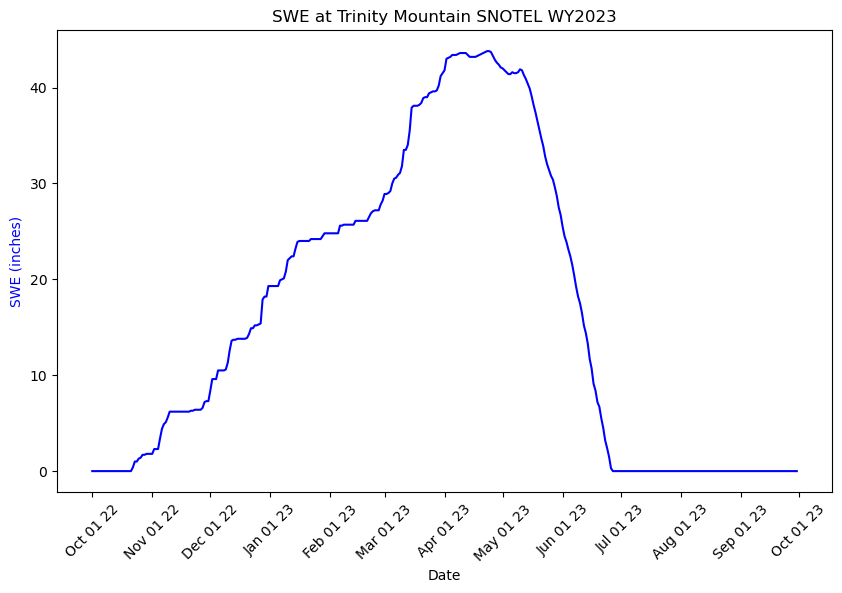

In [20]:
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(df_swe['Date'],df_swe['SWE'], color='blue', label='SWE (inches)')
ax1.set_xlabel('Date')
ax1.set_ylabel('SWE (inches)', color='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('SWE at Trinity Mountain SNOTEL WY2023')
plt.show()

In [38]:
SWE_max=df_swe['SWE'].max()
Date_SWE_max=df_swe.loc[df_swe['SWE'].idxmax(),'Date']
SWE_end=df_swe[(df_swe['Date']>Date_SWE_max) & (df_swe['SWE']>0.0)]['SWE'].iloc[-1]
print(f'Max SWE: {SWE_max} inches on {Date_SWE_max.date()}') #adding the .date() takes away the time component of the date!
print(f'SWE at end of melt season: {SWE_end} inches')

Max SWE: 43.8 inches on 2023-04-23
SWE at end of melt season: 0.3 inches


In [40]:
#Now I need to find the DDF by isolating only days when TAVG>0 and after date of max SWE
mask=(df_swe['TAVG']>0) & (df_swe['Date']>Date_SWE_max) & (df_swe['SWE']>0.0)
df_melt=df_swe.loc[mask,['Date','SWE','TAVG']].copy()
#print(df_melt)

del_SWE=SWE_max - SWE_end
sum_TAVG=df_melt['TAVG'].sum()
DDF=del_SWE/sum_TAVG
print(f'Degree Day Factor (DDF) for Trinity Mountain WY2023 melt season: {DDF} inches/°C/day')

Degree Day Factor (DDF) for Trinity Mountain WY2023 melt season: 0.1192434210526316 inches/°C/day


In [ ]:
#Now let's see how accurately the DDF predicts the daily melt

#Here just setting up a new dataframe for the model results (under column "Melt Predicted")

df_model=df_swe.copy()
mask2=df_model['Date']>Date_SWE_max
df_model.loc[mask2,'Melt Predicted']=np.nan
df_model.loc[mask2, 'SWE Predicted']=np.nan

print(df_model[208:215])

          Date   SWE  TAVG  Melt Predicted
208 2023-04-27  42.9   3.4             NaN
209 2023-04-28  42.6   4.7             NaN
210 2023-04-29  42.4   4.1             NaN
211 2023-04-30  42.1   8.4             NaN
212 2023-05-01  42.0   9.8             NaN
213 2023-05-02  41.8  12.2             NaN
214 2023-05-03  41.6   9.2             NaN


In [46]:
#Now let's refill the "Melt Predicted" column using the DDF and TAVG values

for i in range(len(df_model)-1):
    if df_model.loc[i,'Date']>Date_SWE_max and df_model.loc[i,'TAVG']>0 and df_model.loc[i,'SWE']>0:
        df_model.loc[i,'Melt Predicted']=DDF * df_model.loc[i,'TAVG']
        df_model.loc[i+1,'SWE Predicted']=df_model.loc[i,'SWE'] - (DDF* df_model.loc[i,'TAVG'])
    else:
        df_model.loc[i,'Melt Predicted']=0.0
        df_model.loc[i+1,'SWE Predicted']=df_model.loc[i,'SWE']
print(df_model[208:215])

          Date   SWE  TAVG  Melt Predicted  SWE Predicted
208 2023-04-27  42.9   3.4        0.405428      43.300000
209 2023-04-28  42.6   4.7        0.560444      42.494572
210 2023-04-29  42.4   4.1        0.488898      42.039556
211 2023-04-30  42.1   8.4        1.001645      41.911102
212 2023-05-01  42.0   9.8        1.168586      41.098355
213 2023-05-02  41.8  12.2        1.454770      40.831414
214 2023-05-03  41.6   9.2        1.097039      40.345230


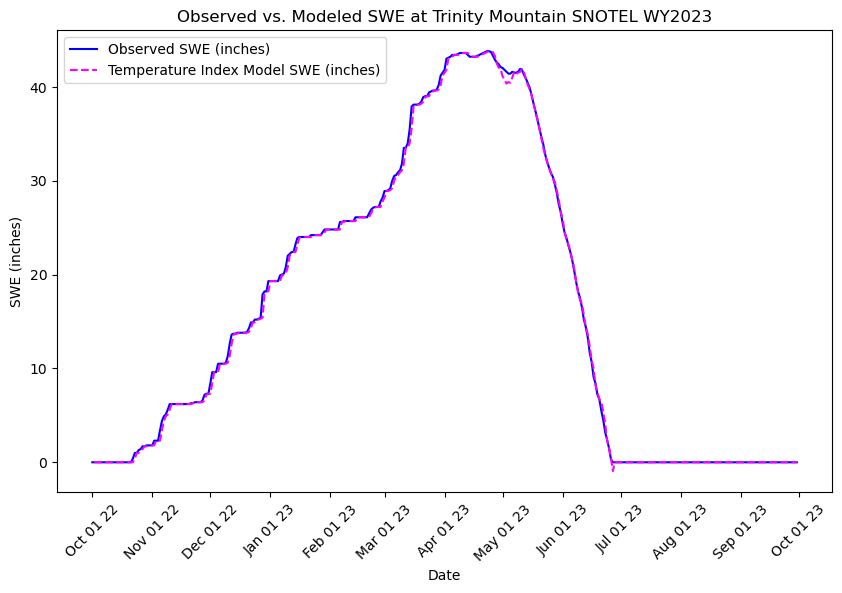

In [55]:
#Plot our model versus observed melt at Trinity Mountain WY2023. These should nearly be identical, since the model is from the observations.

fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.plot(df_swe['Date'],df_swe['SWE'], color='blue', label='Observed SWE (inches)')
ax2.plot(df_model['Date'],df_model['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax2.set_xlabel('Date')
ax2.set_ylabel('SWE (inches)')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2023')
ax2.legend()
plt.show()

In [56]:
#Let's try another year with the same DDF!

df_2019=pd.read_csv('TM WY 2019 SWE.csv')
print(df_2019)

    Site Id       Date   Time  WTEQ.I-1 (in)   PREC.I-1 (in)   \
0       830  10/1/2018    NaN             0.0             0.0   
1       830  10/2/2018    NaN             0.0             0.0   
2       830  10/3/2018    NaN             0.0             0.0   
3       830  10/4/2018    NaN             0.0             0.0   
4       830  10/5/2018    NaN             0.0             0.6   
..      ...        ...    ...             ...             ...   
365     830  9/30/2019  23:59           -99.9            53.5   
366     NaN        NaN    NaN             NaN             NaN   
367     NaN        NaN    NaN             NaN             NaN   
368     NaN        NaN    NaN             NaN             NaN   
369                NaN    NaN             NaN             NaN   

     TOBS.I-1 (degC)   TMAX.D-1 (degC)   TMIN.D-1 (degC)   TAVG.D-1 (degC)   \
0                 0.3              12.4              -0.1               6.2   
1                 8.8              14.8              -0.8    

In [57]:
#Remove extra spaces, rename columns, truncate df, delete NaN rows
df_2019=df_2019.iloc[:-5]  # remove last row which is a summary row
df_2019.columns=df_2019.columns.str.strip() # remove any leading/trailing whitespace
df_2019=df_2019.rename(columns={'Date':'Date', 'WTEQ.I-1 (in)': 'SWE', 'TAVG.D-1 (degC)': 'TAVG'})
df_2019_SWE=df_2019[['Date','SWE','TAVG']].copy()
df_2019_SWE['Date']=pd.to_datetime(df_2019_SWE['Date'], format='%m/%d/%Y')
print(df_2019_SWE)

          Date  SWE  TAVG
0   2018-10-01  0.0   6.2
1   2018-10-02  0.0   7.7
2   2018-10-03  0.0  10.0
3   2018-10-04  0.0   7.9
4   2018-10-05  0.0   3.2
..         ...  ...   ...
360 2019-09-26  0.0   7.8
361 2019-09-27  0.0   9.9
362 2019-09-28  0.0   5.5
363 2019-09-29  0.0   0.5
364 2019-09-30  0.0  -3.4

[365 rows x 3 columns]


In [61]:
#Find max SWE and date of max SWE for 2019 data
SWE_max_2019=df_2019_SWE['SWE'].max()
Date_SWE_max_2019=df_2019_SWE.loc[df_2019_SWE['SWE'].idxmax(),'Date']
SWE_end_2019=df_2019_SWE[(df_2019_SWE['Date']>Date_SWE_max_2019) & (df_2019_SWE['SWE']>0.0)]['SWE'].iloc[-1]
Date_SWE_end_2019=df_2019_SWE.loc[df_2019_SWE['SWE']==SWE_end_2019,'Date'].iloc[1]
print(f'Max SWE 2019: {SWE_max_2019} inches on {Date_SWE_max_2019.date()}')
print(f'SWE at end of melt season 2019: {SWE_end_2019} inches on {Date_SWE_end_2019.date()}')

Max SWE 2019: 42.6 inches on 2019-04-10
SWE at end of melt season 2019: 0.4 inches on 2019-06-27


In [62]:
#Making a copy DF for the 2019 model
df_model_2019=df_2019_SWE[(df_2019_SWE['Date']>=Date_SWE_max_2019) & (df_2019_SWE['Date']<=Date_SWE_end_2019)].copy()
df_model_2019=df_model_2019.reset_index(drop=True)
df_model_2019['Melt Predicted']=np.nan
df_model_2019['SWE Predicted']=np.nan
print(df_model_2019)

         Date   SWE  TAVG  Melt Predicted  SWE Predicted
0  2019-04-10  42.6  -0.3             NaN            NaN
1  2019-04-11  41.6  -2.7             NaN            NaN
2  2019-04-12  41.5  -1.8             NaN            NaN
3  2019-04-13  41.5  -1.8             NaN            NaN
4  2019-04-14  41.6   0.2             NaN            NaN
..        ...   ...   ...             ...            ...
74 2019-06-23   3.9   6.2             NaN            NaN
75 2019-06-24   2.5   9.0             NaN            NaN
76 2019-06-25   1.4   8.6             NaN            NaN
77 2019-06-26   0.5  10.5             NaN            NaN
78 2019-06-27   0.4  11.1             NaN            NaN

[79 rows x 5 columns]


In [63]:
#Now I'm going to use the DDF from 2023 to model the melt in 2019

for i in range(len(df_model_2019)-1):
    if df_model_2019.loc[i,'TAVG']>0 and df_model_2019.loc[i,'SWE']>0:
        df_model_2019.loc[i,'Melt Predicted']=DDF * df_model_2019.loc[i,'TAVG']
        df_model_2019.loc[i+1,'SWE Predicted']=df_model_2019.loc[i,'SWE'] - (DDF* df_model_2019.loc[i,'TAVG'])
    else:
        df_model_2019.loc[i,'Melt Predicted']=0.0
        df_model_2019.loc[i+1,'SWE Predicted']=df_model_2019.loc[i,'SWE']
print(df_model_2019)

         Date   SWE  TAVG  Melt Predicted  SWE Predicted
0  2019-04-10  42.6  -0.3        0.000000            NaN
1  2019-04-11  41.6  -2.7        0.000000      42.600000
2  2019-04-12  41.5  -1.8        0.000000      41.600000
3  2019-04-13  41.5  -1.8        0.000000      41.500000
4  2019-04-14  41.6   0.2        0.023849      41.500000
..        ...   ...   ...             ...            ...
74 2019-06-23   3.9   6.2        0.739309       4.797286
75 2019-06-24   2.5   9.0        1.073191       3.160691
76 2019-06-25   1.4   8.6        1.025493       1.426809
77 2019-06-26   0.5  10.5        1.252056       0.374507
78 2019-06-27   0.4  11.1             NaN      -0.752056

[79 rows x 5 columns]


In [64]:
df_model_2019.loc[0,'SWE Predicted']=SWE_max_2019
print(df_model_2019)

         Date   SWE  TAVG  Melt Predicted  SWE Predicted
0  2019-04-10  42.6  -0.3        0.000000      42.600000
1  2019-04-11  41.6  -2.7        0.000000      42.600000
2  2019-04-12  41.5  -1.8        0.000000      41.600000
3  2019-04-13  41.5  -1.8        0.000000      41.500000
4  2019-04-14  41.6   0.2        0.023849      41.500000
..        ...   ...   ...             ...            ...
74 2019-06-23   3.9   6.2        0.739309       4.797286
75 2019-06-24   2.5   9.0        1.073191       3.160691
76 2019-06-25   1.4   8.6        1.025493       1.426809
77 2019-06-26   0.5  10.5        1.252056       0.374507
78 2019-06-27   0.4  11.1             NaN      -0.752056

[79 rows x 5 columns]


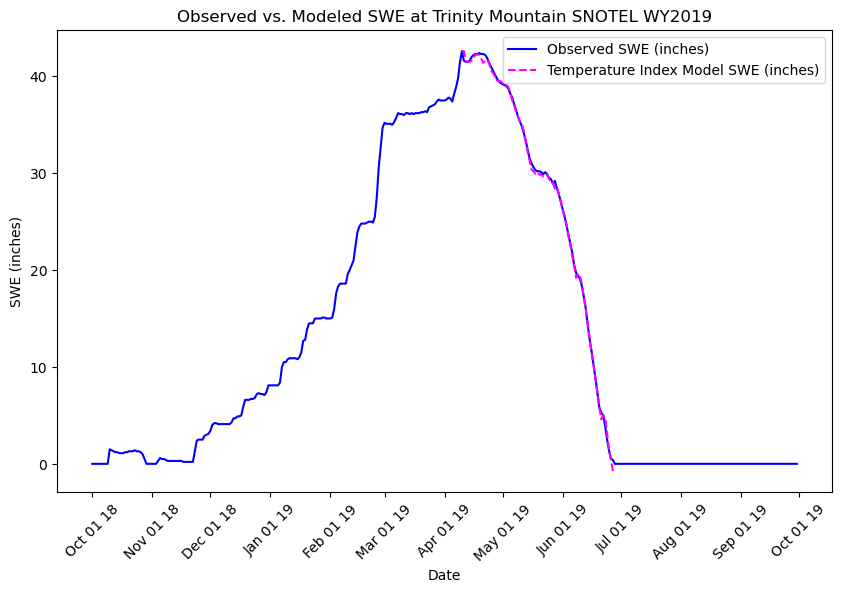

In [65]:
fig3, ax3 = plt.subplots(figsize=(10,6))
ax3.plot(df_2019_SWE['Date'],df_2019_SWE['SWE'], color='blue', label='Observed SWE (inches)')
ax3.plot(df_model_2019['Date'],df_model_2019['SWE Predicted'], color='magenta', linestyle='--', label='Temperature Index Model SWE (inches)')
ax3.set_xlabel('Date')
ax3.set_ylabel('SWE (inches)')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %y'))
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.tick_params(axis='x', rotation=45)
ax3.set_title('Observed vs. Modeled SWE at Trinity Mountain SNOTEL WY2019')
ax3.legend()
plt.show()